In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.append("../code")
import plotting
import parameters

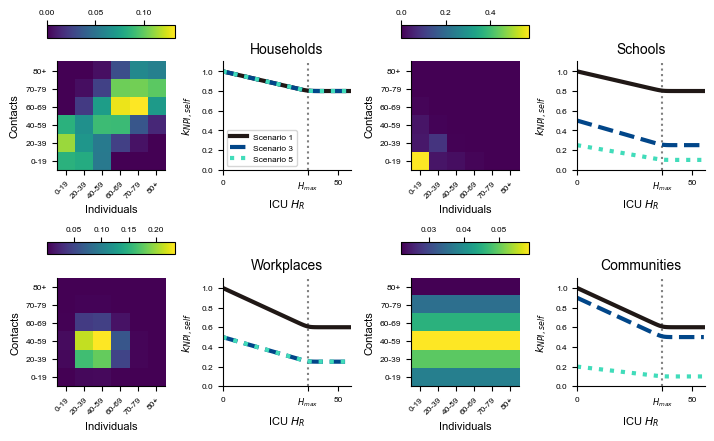

In [4]:
plotting.set_rcParams(arial=True)

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["xtick.labelsize"] = 6
mpl.rcParams["ytick.labelsize"] = 6
mpl.rcParams["legend.fontsize"] = 6
mpl.rcParams["axes.titlesize"]= 10
mpl.rcParams["axes.labelsize"] = 8

agegroups = ["0-19", "20-39", "40-59", "60-69","70-79", "80+"]
scenarios = ['Scenario 1', 'Scenario 2','Scenario 3','Scenario 4','Scenario 5']


data = pd.read_csv('../parameters/scenariosDefinition.csv', sep=';', header=0)

cm = 1/2.54
fig = plt.figure(figsize=(18*cm,11*cm), constrained_layout=True)
grid = fig.add_gridspec(ncols=4, nrows=2)#, hspace=0.2, wspace=0.15)
ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[1])
ax3 = fig.add_subplot(grid[2])
ax4 = fig.add_subplot(grid[3])
ax5 = fig.add_subplot(grid[4])
ax6 = fig.add_subplot(grid[5])
ax7 = fig.add_subplot(grid[6])
ax8 = fig.add_subplot(grid[7])

matrixaxes = [ax1,ax3,ax5,ax7]
scenarioaxes = [ax2,ax4,ax6,ax8]


Cs_own = parameters.calc_Cs()

matrices = []
for m in Cs_own:
    m = np.flip(m.transpose(), axis=0)
    matrices.append(m)
    

for ax, matrix in zip(matrixaxes, matrices):
    ax.imshow(np.flip(matrix, axis=0), cmap='gray', origin='lower')
    maxval = np.max(matrix.flatten())
    maxval2 = np.round(maxval/2, decimals=2)
    if ax == ax7:
        maxval2 = np.round(maxval/2, decimals=3)
    ax.figure.colorbar(ax.imshow(matrix), ax=ax,location='top', aspect=10)


#Matrix labels:
labels=['Households','Schools','Workplaces','Communities']

for ax in matrixaxes:
    ax.set_xticks(np.arange(len(agegroups)))
    ax.set_yticks(np.arange(len(agegroups)))
    ax.set_xticklabels(agegroups)
    ax.set_yticklabels(np.flip(agegroups))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    
    ax.set_ylabel('Contacts')
    ax.set_xlabel('Individuals')
   

for ax in [ax2,ax4,ax6,ax8]:
    ax.set_ylabel('$k_{NPI,self}$')
   
    
        
for ax, axred, label,t in zip(matrixaxes, scenarioaxes, ['a','b','c','d'],labels):
        #ax.text(-.8,1.3,label, size=10, weight='bold', color='black', transform=ax.transAxes)
        axred.set_title(t)



Hmax = 37
epsilon=1

def f(ICU, saturation, slope, ICUcap):
    return saturation - slope*epsilon*np.log(np.e**(1/epsilon*(ICUcap-ICU))+1)

highvalues = ['householdlow','schoollow','workplacelow','communitylow']
lowvalues = ['householdhigh','schoolhigh','workplacehigh','communityhigh']


hline3 = np.linspace(0,55,100)

colors = ['#19191b','#022b53','#054583','#0894b8', '#14c1ed']
colors = ['#201816','#014689', '#41dcba']
llabels = ['Scenario 1', 'Scenario 3', 'Scenario 5']


linestyles=['-','--',':']
linewidths = [3,3,3]
order = [-5,-3,-1]

for ax, highs, lows in zip(scenarioaxes, highvalues, lowvalues):
    ax.set_xlabel('ICU $H_R$')   
    ax.set_ylim(0,1.1)
    ax.set_xlim(0,Hmax*1.5)
    ax.axvline(Hmax,linestyle=':',color='gray', zorder=-8)
    for i, o, c, l1, l2, scen in zip([0,2,4],order, colors,linestyles,linewidths,llabels):
        sat = 1-data[highs][i]
        slope = ((1-data[highs][i]) - (1-data[lows][i]))/Hmax
        softplus = f(hline3, sat, slope, Hmax)
        ax.plot(hline3, 1-softplus, color=c, lw=l2, ls=l1,zorder=o, label=scen)
        
    ax.set_xticks([0,Hmax,50])
    ax.set_xticklabels(['0', '$H_{max}$', '50'])
   
ax2.legend()
    
fig.align_xlabels 
fig.align_ylabels

plt.savefig('./figures/fig_contactmatrices.pdf')
plt.show()

